# Short-term Electricity Load Forecasting (Panama Case Study)



# Table of Contents

- [<font size="5">1. Exploration and Cleaning</font>](#ref2)

    - [<font size="4">1.1 Dataset</font>](#ref21)

    - [<font size="4">1.2 Data Preprocessing</font>](#ref22)
    
    
    
- [<font size="5">2. Time Series Analysis</font>](#ref3)

    - [<font size="4">2.1 Decomposition and stationarity tests</font>](#ref31)

    - [<font size="4">2.2 Autocorrelation and Partial Autocorrelation</font>](#ref32)


- [<font size="5">3. Feature Engineering</font>](#ref4)

    - [<font size="4">3.1 Feature Generation](#ref41)
    

- [<font size="5">4. Load Forecasting</font>](#ref5)

    - [<font size="4">4.1 MLR</font>](#ref51)

    - [<font size="4">4.2 Neural Network</font>](#ref52)

    - [<font size="4">4.3 Neural Network with Random Search Optimization</font>](#ref53)

# <a id='ref2'>1. Exploration and Cleaning</a>

## <a id='ref21'>1.1 Dataset

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score



%matplotlib inline



In [2]:
df = pd.read_csv('data/continuous dataset.csv')
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [3]:
df.dtypes

datetime       object
nat_demand    float64
T2M_toc       float64
QV2M_toc      float64
TQL_toc       float64
W2M_toc       float64
T2M_san       float64
QV2M_san      float64
TQL_san       float64
W2M_san       float64
T2M_dav       float64
QV2M_dav      float64
TQL_dav       float64
W2M_dav       float64
Holiday_ID      int64
holiday         int64
school          int64
dtype: object

In [4]:
df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


In [5]:
print('There are {} missing values or NANs in df.'.format(df.isnull().values.sum()))
temp_df = df.duplicated(keep='first').sum()
print('There are {} duplicate rows in df based on all columns.'.format(temp_df))

There are 0 missing values or NANs in df.
There are 0 duplicate rows in df based on all columns.


## <a id="ref22">1.2 Data Preprocessing

In [6]:
df.datetime = pd.to_datetime(df.datetime.astype(str))
df.set_index(df["datetime"],inplace=True)
df.sort_index(inplace=True)
df = df['2018':'2019']

In [7]:
df.drop("datetime",axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2018-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  17520 non-null  float64
 1   T2M_toc     17520 non-null  float64
 2   QV2M_toc    17520 non-null  float64
 3   TQL_toc     17520 non-null  float64
 4   W2M_toc     17520 non-null  float64
 5   T2M_san     17520 non-null  float64
 6   QV2M_san    17520 non-null  float64
 7   TQL_san     17520 non-null  float64
 8   W2M_san     17520 non-null  float64
 9   T2M_dav     17520 non-null  float64
 10  QV2M_dav    17520 non-null  float64
 11  TQL_dav     17520 non-null  float64
 12  W2M_dav     17520 non-null  float64
 13  Holiday_ID  17520 non-null  int64  
 14  holiday     17520 non-null  int64  
 15  school      17520 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 2.3 MB


In [8]:
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig,ax = plt.subplots(figsize=(30,12))
    ax.set_xlabel('Time',fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel,fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

/var/folders/g9/8dl_m7ms2gd5gm2zghqh2rl00000gn/T/ipykernel_1297/1377567740.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


# <a id="ref3">2. Time Series Analysis

## <a id="ref31">2.1 Decomposition and Stationarity Tests

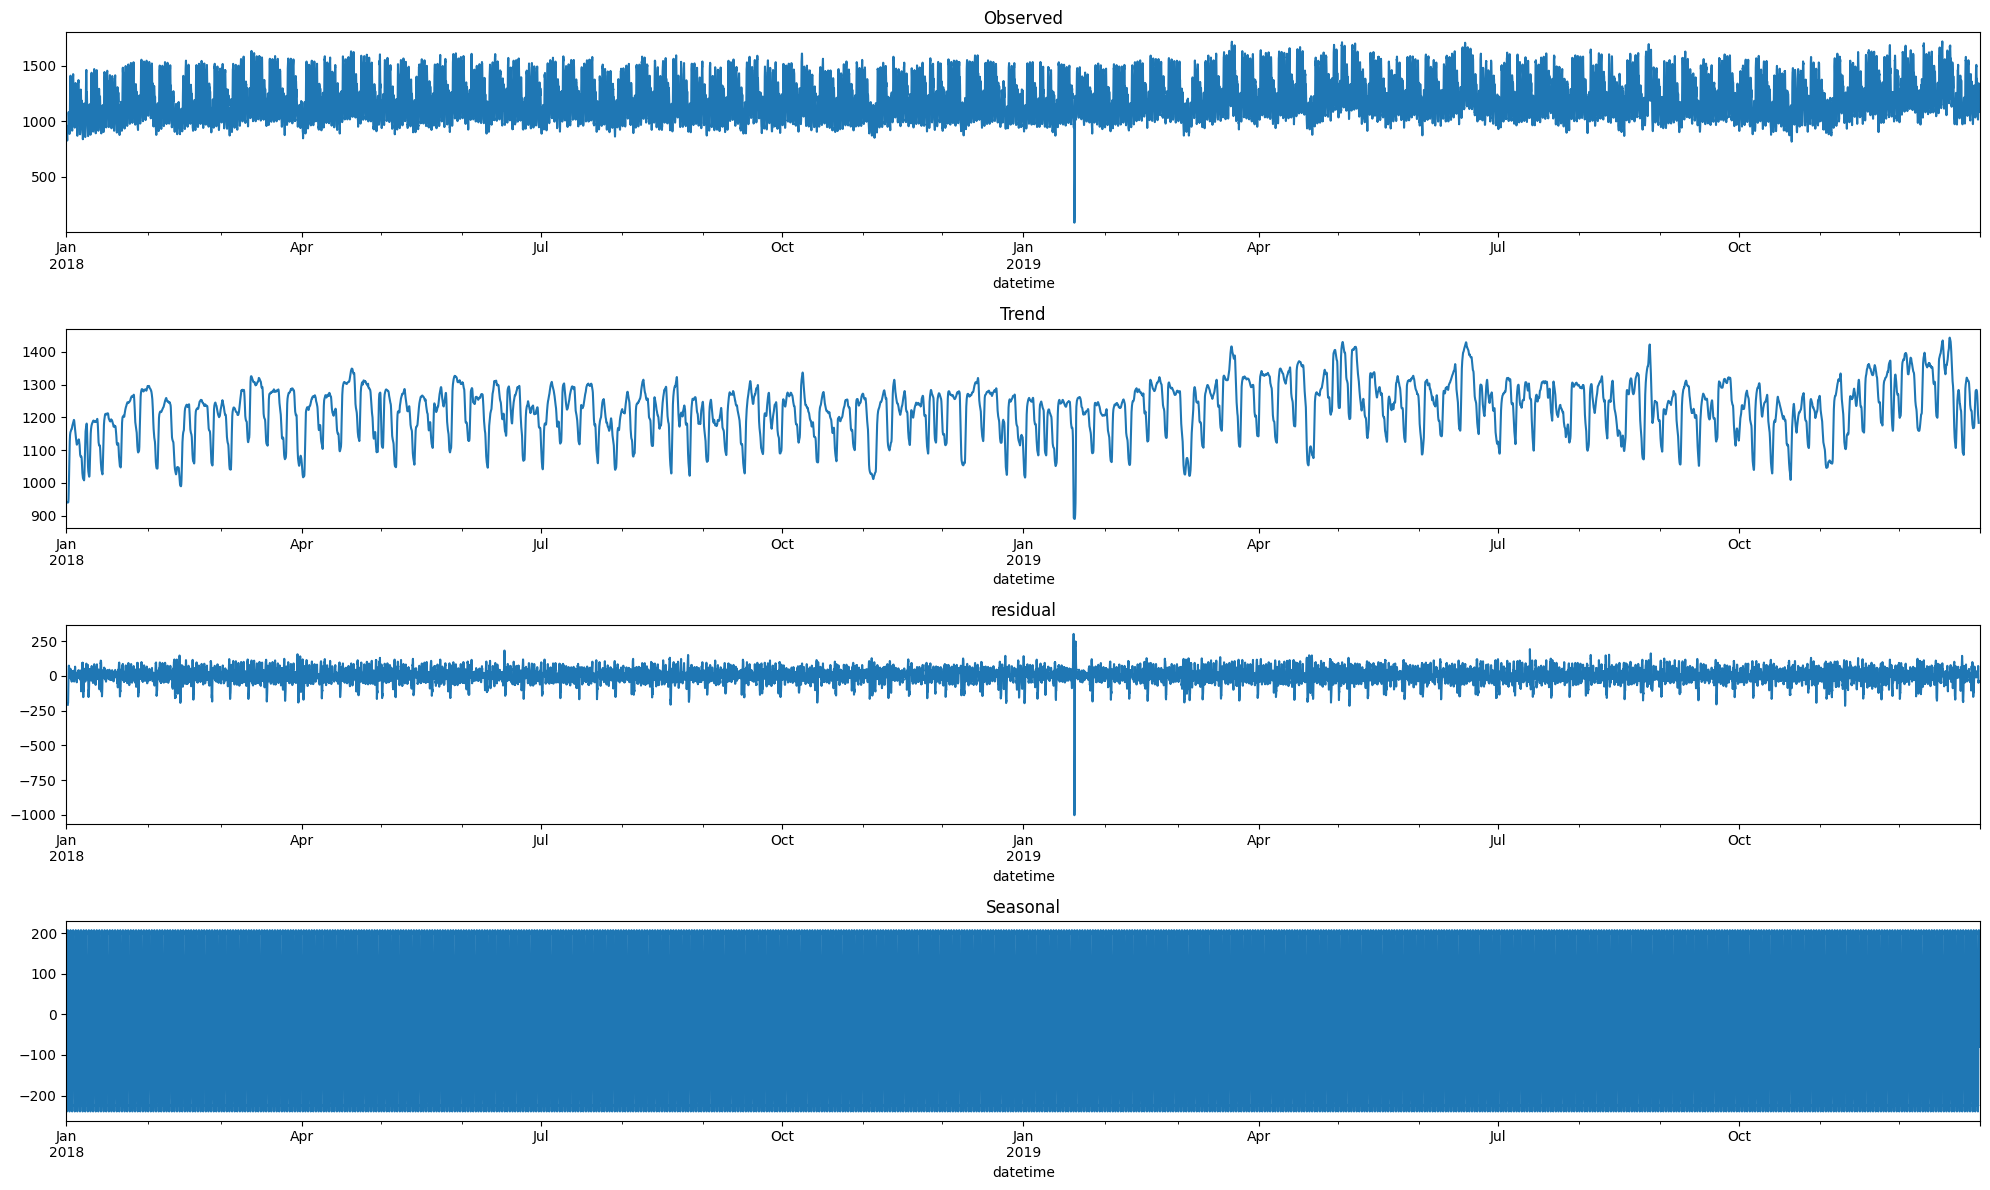

In [9]:
res = sm.tsa.seasonal_decompose(df["nat_demand"],model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [10]:
value_to_change = df[df["nat_demand"]<800][["nat_demand"]]

df.loc[value_to_change.index,"nat_demand"] = 900





**Augmented Dickey-Fuller (ADF) Test**

In [11]:
y = df["nat_demand"]
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0],adf_test[1],adf_test[2]))
for key,value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key,value))


ADF Statistic: -13.234764
p-value: 0.000000
#Lags used: 44
Critical Value (1%): -3.430724
Critical Value (5%): -2.861705
Critical Value (10%): -2.566858


## <a id="ref32">2.2 Autocorrelation and Partial Autocorrelation </a>

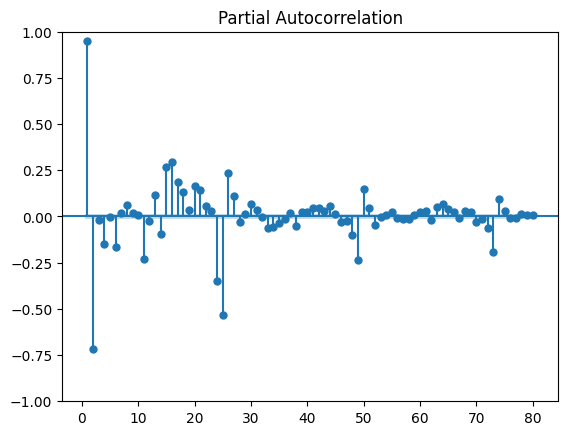

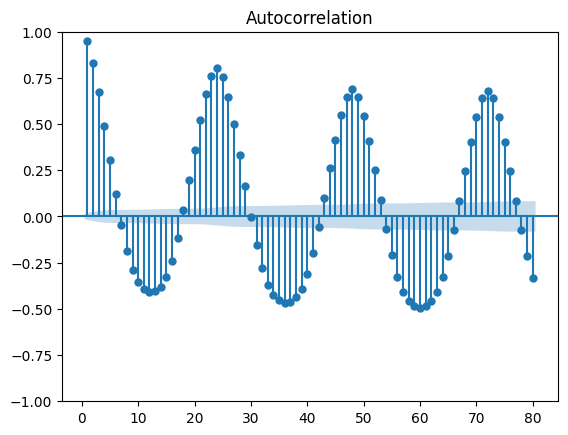

In [12]:
#Lag-value check

plot_pacf(df["nat_demand"], lags=80, zero = False)
plot_acf(df["nat_demand"], lags=80, zero=False)
plt.show()

In [13]:
import statsmodels.api as sm

pacf,ci = sm.tsa.pacf(df["nat_demand"],alpha=0.05)

pacf_index = np.where(np.absolute(ci[:,0]) > 0.25)
print("significant time-lags: ",pacf_index[0])



significant time-lags:  [ 0  1  2 15 16 24 25]


In [14]:
df["nat_demand_lag_1"] = df["nat_demand"].shift(1)
df["nat_demand_lag_2"] = df["nat_demand"].shift(2)
df["nat_demand_lag_15"] = df["nat_demand"].shift(15)
df["nat_demand_lag_16"] = df["nat_demand"].shift(16)
df["nat_demand_lag_24"] = df["nat_demand"].shift(24)
df["nat_demand_lag_25"] = df["nat_demand"].shift(25)

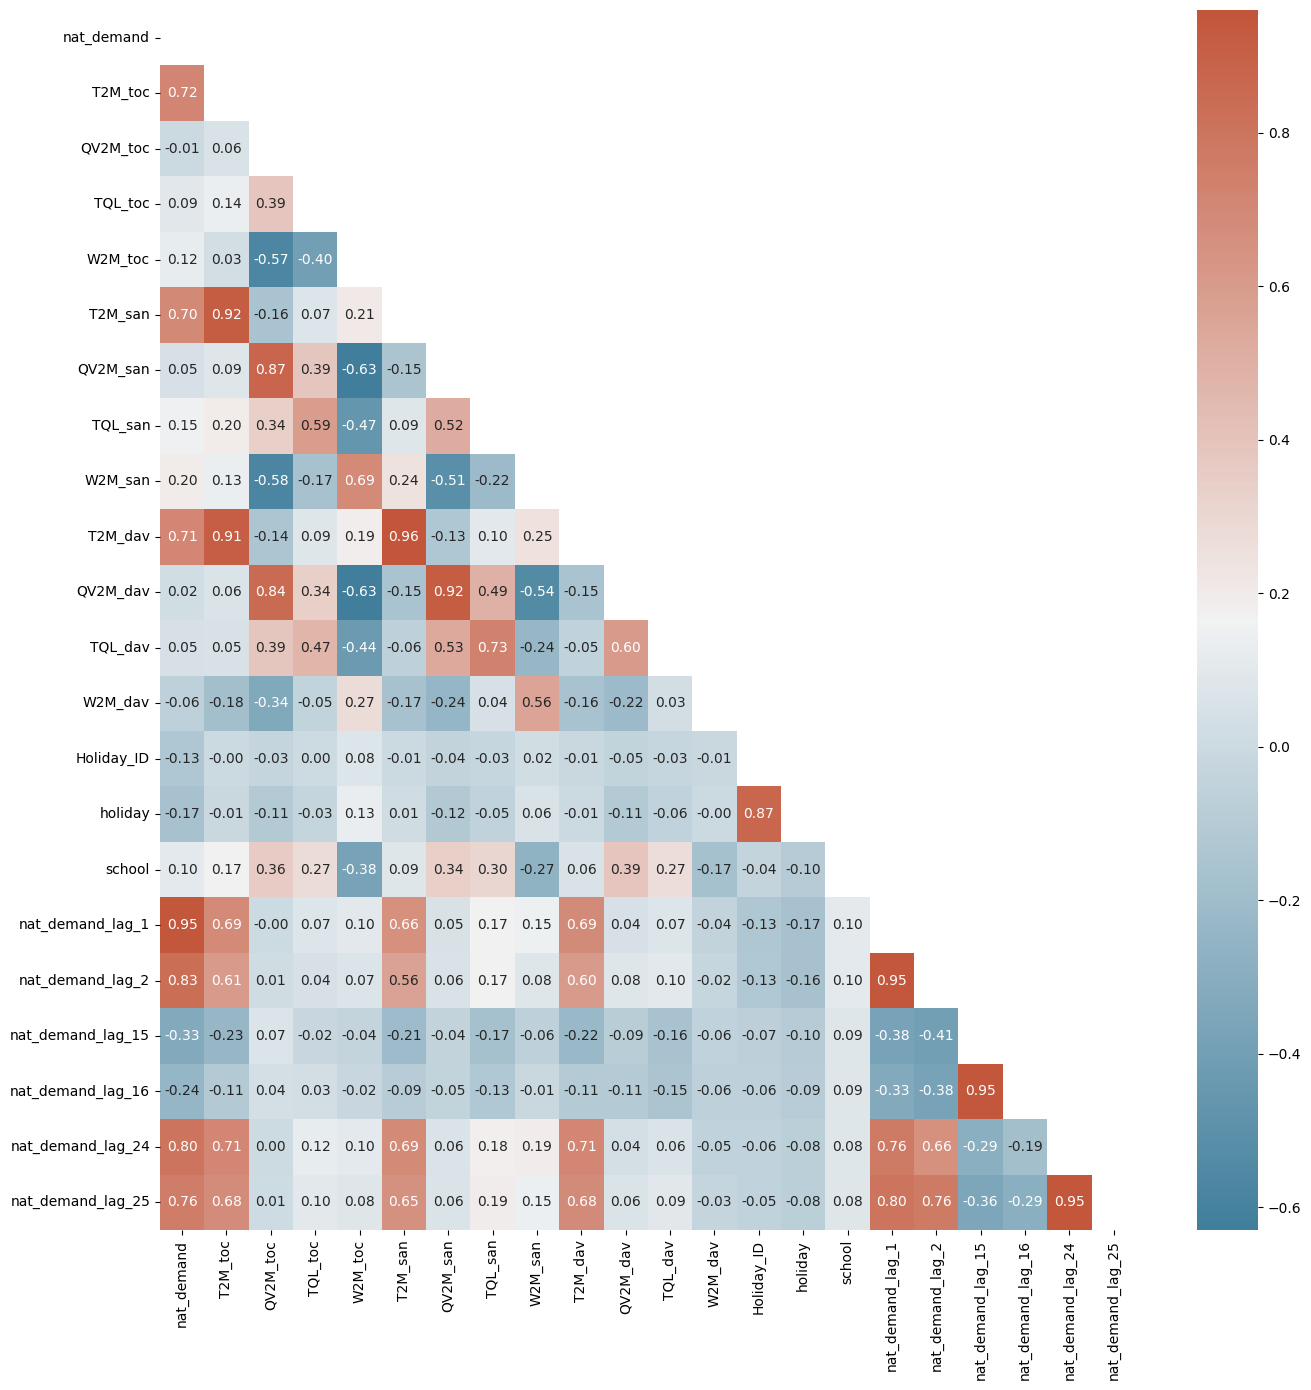

In [15]:
#Correlation plot

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)

fig = plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt= '.2f',mask=mask, cmap = cmap)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show 

In [16]:
highly_correlated = abs(corr[corr > 0.6])
print(highly_correlated[highly_correlated<1.0]["nat_demand"].dropna())

T2M_toc              0.715809
T2M_san              0.695175
T2M_dav              0.707742
nat_demand_lag_1     0.949474
nat_demand_lag_2     0.830758
nat_demand_lag_24    0.803952
nat_demand_lag_25    0.757226
Name: nat_demand, dtype: float64


In [17]:
categorical = ["Holiday_ID","holiday","school","hour","weekday","month"]

features_continuous = highly_correlated[highly_correlated<1.0]["nat_demand"].dropna().index.tolist()

features = features_continuous + categorical

target = ["nat_demand"]

print("features that will be used: ",features)

features that will be used:  ['T2M_toc', 'T2M_san', 'T2M_dav', 'nat_demand_lag_1', 'nat_demand_lag_2', 'nat_demand_lag_24', 'nat_demand_lag_25', 'Holiday_ID', 'holiday', 'school', 'hour', 'weekday', 'month']


# <a id="ref4">3. Feature Engineering </a>

## <a id="href41">3.1 Feature Generation </a>

In [18]:
#Generate 'hour', 'weekday', and 'month' features

for i in range(len(df)):
    position = df.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df.loc[position,'hour'] = hour
    df.loc[position,'weekday'] = weekday
    df.loc[position,'month'] = month

In [19]:
#Split Train,Validation and Test Data

df_final = df[target+features]

y = df_final.iloc[:,:1]
X = df_final.iloc[:,1:]

X.reset_index(inplace=True)
y.reset_index(inplace=True)

X_train = X[:12264]
X_val = X[12264:15768]
X_test = X[15768:]

y_train = y[:12264]
y_val = y[12264:15768]
y_test = y[15768:]



In [20]:
X_train.set_index("datetime",inplace=True)
X_val.set_index("datetime",inplace=True)
X_test.set_index("datetime",inplace=True)

y_train.set_index("datetime",inplace=True)
y_val.set_index("datetime",inplace=True)
y_test.set_index("datetime",inplace=True)

In [21]:
X_train.dropna(inplace=True)
y_train = y_train[y_train.index > "2018-01-02 00:00:00"]


/opt/homebrew/lib/python3.11/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:
#Scale data

feature_scaler = MinMaxScaler(feature_range=(0,1.0))
target_scaler = MinMaxScaler(feature_range=(0,1.0))

feature_scaler.fit(np.array(X_train))
target_scaler.fit(np.array(y_train).reshape(-1,1))

X_train_scaled = feature_scaler.transform(np.array(X_train))
X_val_scaled = feature_scaler.transform(np.array(X_val))
X_test_scaled = feature_scaler.transform(np.array(X_test))

y_train_scaled = target_scaler.transform(np.array(y_train).reshape(-1,1))
y_val_scaled = target_scaler.transform(np.array(y_val).reshape(-1,1))
y_test_scaled = target_scaler.transform(np.array(y_test).reshape(-1,1))



# <a id ="ref5">4. Load Forecasting </a>

## <a id="ref51">4.1 Multilinear Regression </a>

In [23]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled,y_train_scaled)

y_pred_lr = linear_reg.predict(X_test_scaled)


y_pred_lr = target_scaler.inverse_transform(y_pred_lr)
y_pred_lr = pd.DataFrame(y_pred_lr, columns=["y_hat"], index=y_test.index)



In [24]:
r2 = r2_score(y_test,y_pred_lr)
mse = mean_squared_error(y_test,y_pred_lr)
mape = mean_absolute_percentage_error(y_test,y_pred_lr)
mae = mean_absolute_error(y_test,y_pred_lr)

print("R2: {}\nMSE: {}\nMAE: {}\nMAPE: {}".format(r2,mse,mae,mape))

R2: 0.9716411637448307
MSE: 1032.8347152795782
MAE: 23.051851108498916
MAPE: 0.018413290661421


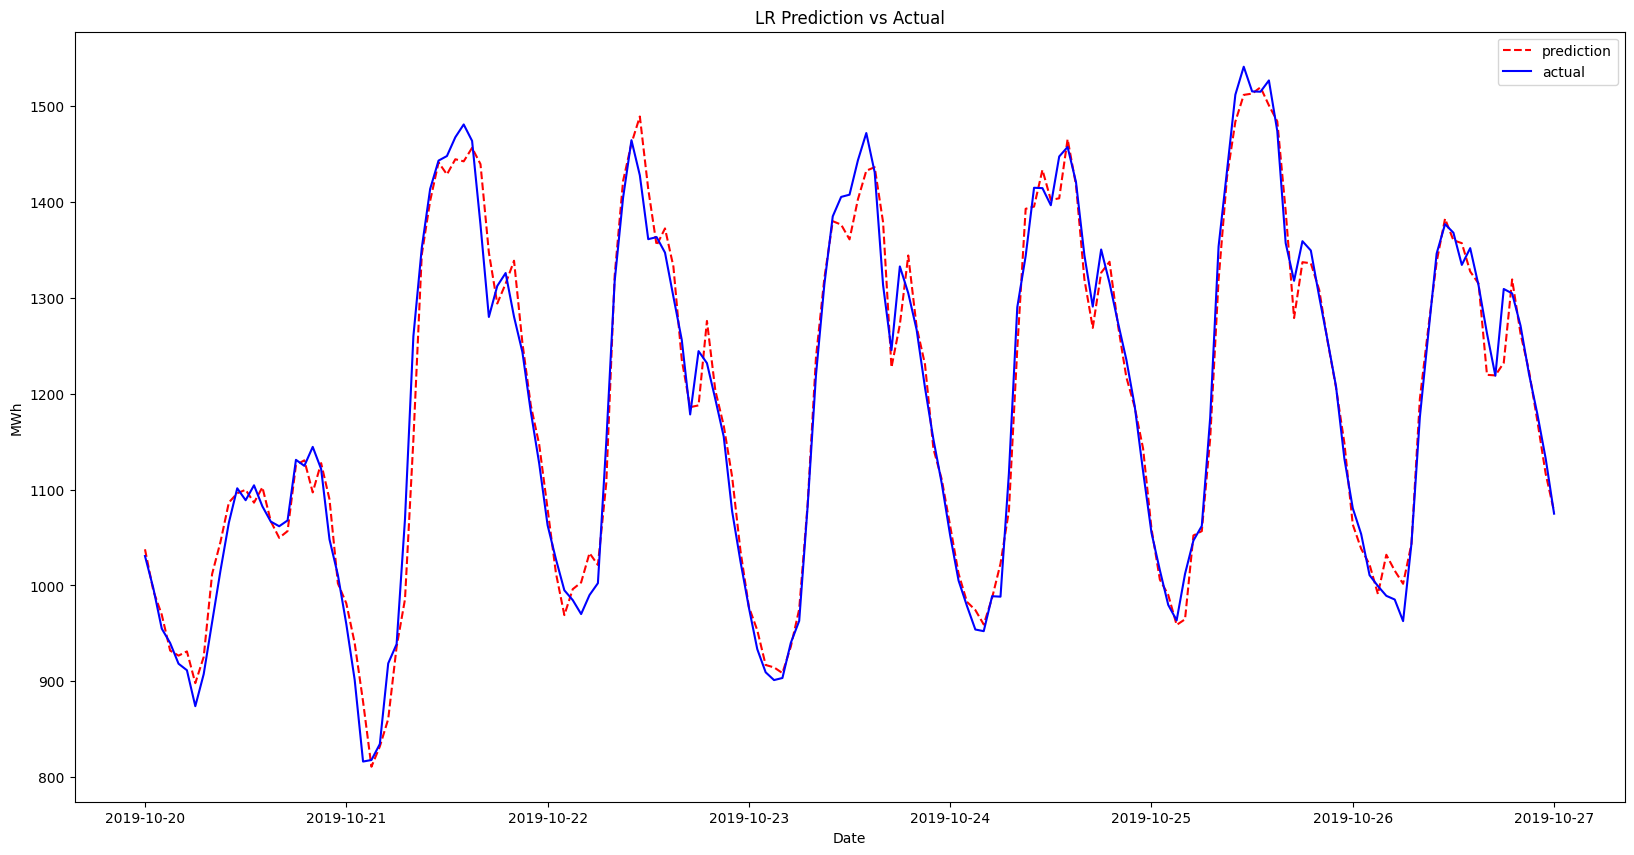

In [52]:
plt.figure(figsize=(20,10))
plt.plot(y_pred_lr["2019-10-20 00:00:00":"2019-10-27 00:00:00"],linestyle="dashed",color='r')
plt.plot(y_test["2019-10-20 00:00:00":"2019-10-27 00:00:00"],linestyle="solid",color='b')
plt.xlabel("Date")
plt.ylabel("MWh")
plt.legend(["prediction","actual"])
plt.title("LR Prediction vs Actual")
plt.show()

## <a id="ref52">4.2 Neural Network </a>

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [27]:
X_train_torch = torch.tensor(X_train_scaled,dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled,dtype=torch.float32)
X_val_torch = torch.tensor(X_val_scaled,dtype=torch.float32)

y_train_torch = torch.tensor(y_train_scaled,dtype=torch.float32)
y_test_torch = torch.tensor(y_test_scaled,dtype=torch.float32)
y_val_torch = torch.tensor(y_val_scaled,dtype=torch.float32)

In [28]:
X_train_torch.shape,X_test_torch.shape

(torch.Size([12239, 13]), torch.Size([1752, 13]))

In [36]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x



In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [38]:

model_pt = NeuralNetwork().to(device)

loss_fn = torch.nn.MSELoss()

optimizer = optim.Adam(model_pt.parameters(),lr=0.0001)

print(model_pt)


NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [39]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0,len(X_train_torch),batch_size):
        Xbatch = X_train_torch[i:i+batch_size]
        y_pred = model_pt(Xbatch)
        ybatch = y_train_torch[i:i+batch_size]
        loss = loss_fn(y_pred,ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epochs {epoch}, latest loss {loss}')

Finished epochs 0, latest loss 0.0035083135589957237
Finished epochs 1, latest loss 0.0028179949149489403
Finished epochs 2, latest loss 0.002158558927476406
Finished epochs 3, latest loss 0.0016209486639127135
Finished epochs 4, latest loss 0.0013371625682339072
Finished epochs 5, latest loss 0.0011432451428845525
Finished epochs 6, latest loss 0.0010561083909124136
Finished epochs 7, latest loss 0.0010317385895177722
Finished epochs 8, latest loss 0.0009787866147235036
Finished epochs 9, latest loss 0.0009759503300301731
Finished epochs 10, latest loss 0.000953041308093816
Finished epochs 11, latest loss 0.0009265156113542616
Finished epochs 12, latest loss 0.0009106073994189501
Finished epochs 13, latest loss 0.0009054511319845915
Finished epochs 14, latest loss 0.0008988191839307547
Finished epochs 15, latest loss 0.000877345388289541
Finished epochs 16, latest loss 0.0008478033123537898
Finished epochs 17, latest loss 0.0008355955360457301
Finished epochs 18, latest loss 0.0008145

In [43]:
with torch.no_grad():
    y_pred = model_pt(X_test_torch)

y_pred = y_pred.numpy()
y_pred = target_scaler.inverse_transform(y_pred)
y_pred = pd.DataFrame(y_pred,columns=['y_pred_nn'],index=y_test.index)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print("R2: {}\nMSE: {}\nMAE: {}\nMAPE: {}".format(r2,mse,mae,mape))


R2: 0.9766391117675698
MSE: 850.8084086779828
MAE: 21.616475466654176
MAPE: 0.017311796967322005


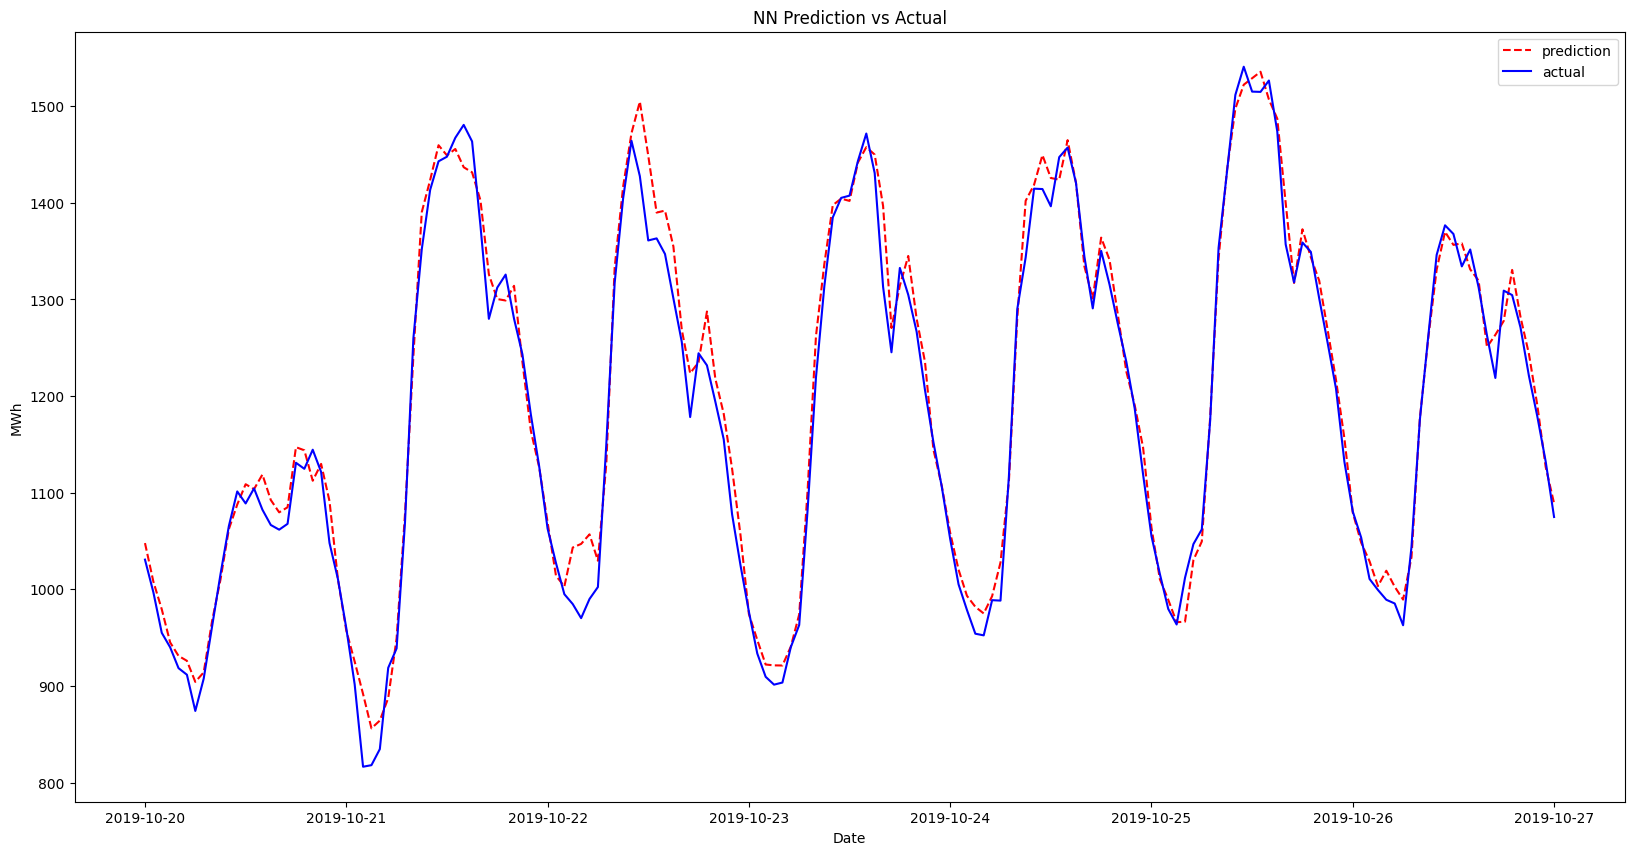

In [51]:
plt.figure(figsize=(20,10))
plt.plot(y_pred["2019-10-20 00:00:00":"2019-10-27 00:00:00"],linestyle="dashed",color='r')
plt.plot(y_test["2019-10-20 00:00:00":"2019-10-27 00:00:00"],linestyle="solid",color='b')
plt.xlabel("Date")
plt.ylabel("MWh")
plt.legend(["prediction","actual"])
plt.title("NN Prediction vs Actual")
plt.show()

## <a id="ref53">4.3 Neural Network with Random Search Optimization </a>

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
import keras_tuner

/var/folders/g9/8dl_m7ms2gd5gm2zghqh2rl00000gn/T/ipykernel_1297/912831350.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [54]:
#Define Custom Metric

class CustomMetric(keras.metrics.Metric):
    def __init__(self, **kwargs):
        # Specify the name of the metric as "custom_metric".
        name = kwargs.pop("name","custom_metric")
        super().__init__(name=name, **kwargs)
        self.sum = self.add_weight(name="sum", initializer="zeros")
        self.count = self.add_weight(name="count", dtype=tf.int32, initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        values = tf.math.squared_difference(y_pred, y_true)
        count = tf.shape(y_true)[0]
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            values *= sample_weight
            count *= sample_weight
        self.sum.assign_add(tf.reduce_sum(values))
        self.count.assign_add(count)

    def result(self):
        return self.sum / tf.cast(self.count, tf.float32)

    def reset_states(self):
        self.sum.assign(0)
        self.count.assign(0)
        
    def get_config(self):
        base_config = super().get_config()
        return {**base_config}
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [64]:
#Define Model
tf.keras.backend.clear_session()

def build_model(hp):
    model_tf = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model_tf.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value = 32,
                                            max_value = 512,
                                            step = 32),
                                        activation = "relu"))
    model_tf.add(layers.Dense(1,activation = 'linear'))
    model_tf.compile(
        optimizer=keras.optimizers.legacy.Adam(
            hp.Choice('learning_rate', [1e-2,1e-3,1e-4])),
        loss = 'mean_squared_error',
        metrics=[CustomMetric()],)
    return model_tf

In [65]:
tuner = RandomSearch(
    build_model,
    objective=keras_tuner.Objective("val_custom_metric", direction="min"),
    max_trials=5,
    executions_per_trial=2,
    directory='model/tf_1',
    project_name='Electricity Forecasting')

In [66]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [67]:
tuner.search(X_train_scaled,y_train_scaled,
             epochs=20, validation_data = (X_val_scaled,y_val_scaled))

Trial 5 Complete [00h 00m 55s]
val_custom_metric: 0.0007416825683321804

Best val_custom_metric So Far: 0.0006675919867120683
Total elapsed time: 00h 43m 04s
INFO:tensorflow:Oracle triggered exit


In [68]:
tuner.results_summary()

Results summary
Results in model/tf_1/Electricity Forecasting
Showing 10 best trials
Objective(name="val_custom_metric", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 480
learning_rate: 0.0001
units_2: 224
units_3: 512
units_4: 64
units_5: 32
units_6: 96
units_7: 192
units_8: 512
units_9: 128
units_10: 448
units_11: 160
units_12: 448
units_13: 288
units_14: 384
units_15: 224
units_16: 64
Score: 0.0006675919867120683

Trial 3 summary
Hyperparameters:
num_layers: 6
units_0: 32
units_1: 448
learning_rate: 0.001
units_2: 256
units_3: 480
units_4: 512
units_5: 160
units_6: 256
units_7: 352
units_8: 128
units_9: 256
units_10: 224
units_11: 320
units_12: 416
units_13: 352
units_14: 256
units_15: 384
units_16: 288
Score: 0.0006719748489558697

Trial 1 summary
Hyperparameters:
num_layers: 17
units_0: 288
units_1: 32
learning_rate: 0.0001
units_2: 480
units_3: 352
units_4: 448
units_5: 288
units_6: 512
units_7: 416
units_8: 288
units_9: 384
units_10: 448
u

In [69]:
models = tuner.get_best_models(num_models=2)
model_rs = models[0]
model_rs.build(input_shape=(1,13))
model_rs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 64)                   896       
                                                                 
 dense_1 (Dense)             (1, 480)                  31200     
                                                                 
 dense_2 (Dense)             (1, 224)                  107744    
                                                                 
 dense_3 (Dense)             (1, 512)                  115200    
                                                                 
 dense_4 (Dense)             (1, 64)                   32832     
                                                                 
 dense_5 (Dense)             (1, 32)                   2080      
                                                                 
 dense_6 (Dense)             (1, 1)                    3

In [74]:
model_rs.fit(x=X_train_scaled,y=y_train_scaled,batch_size=20,epochs=20,verbose=1,shuffle=True,validation_data = (X_val_scaled,y_val_scaled))

Epoch 1/20
 63/612 [==>...........................] - ETA: 1s - loss: 4.2825e-04 - custom_metric: 4.2825e-04

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric CustomMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


612/612 [==============================] - 2s 3ms/step - loss: 4.1936e-04 - custom_metric: 4.1936e-04 - val_loss: 6.3725e-04 - val_custom_metric: 6.3725e-04
Epoch 2/20
612/612 [==============================] - 2s 3ms/step - loss: 4.3369e-04 - custom_metric: 4.3369e-04 - val_loss: 6.1868e-04 - val_custom_metric: 6.1868e-04
Epoch 3/20
612/612 [==============================] - 2s 3ms/step - loss: 4.2586e-04 - custom_metric: 4.2586e-04 - val_loss: 6.9287e-04 - val_custom_metric: 6.9287e-04
Epoch 4/20
612/612 [==============================] - 2s 3ms/step - loss: 4.1450e-04 - custom_metric: 4.1450e-04 - val_loss: 6.0294e-04 - val_custom_metric: 6.0294e-04
Epoch 5/20
612/612 [==============================] - 2s 3ms/step - loss: 4.0314e-04 - custom_metric: 4.0314e-04 - val_loss: 7.6937e-04 - val_custom_metric: 7.6937e-04
Epoch 6/20
612/612 [==============================] - 2s 3ms/step - loss: 4.0363e-04 - custom_metric: 4.0363e-04 - val_loss: 6.6166e-04 - val_custom_metric: 6.6166e-04
Epo

In [75]:
y_pred_rs = model_rs.predict(X_test_scaled)
y_pred_rescaled = target_scaler.inverse_transform(y_pred_rs)
        
y_hat = pd.DataFrame(y_pred_rescaled, columns=['y_pred_rs'],index=y_test.index)

55/55 [==============================] - 0s 906us/step


In [76]:
r2 = r2_score(y_test,y_hat)
mse = mean_squared_error(y_test,y_hat)
mape = mean_absolute_percentage_error(y_test,y_hat)
mae = mean_absolute_error(y_test,y_hat)

print("R2: {}\nMSE: {}\nMAE: {}\nMAPE: {}".format(r2,mse,mae,mape))

R2: 0.9775625960319215
MSE: 817.1749196781305
MAE: 21.543302599986173
MAPE: 0.016955051319695262


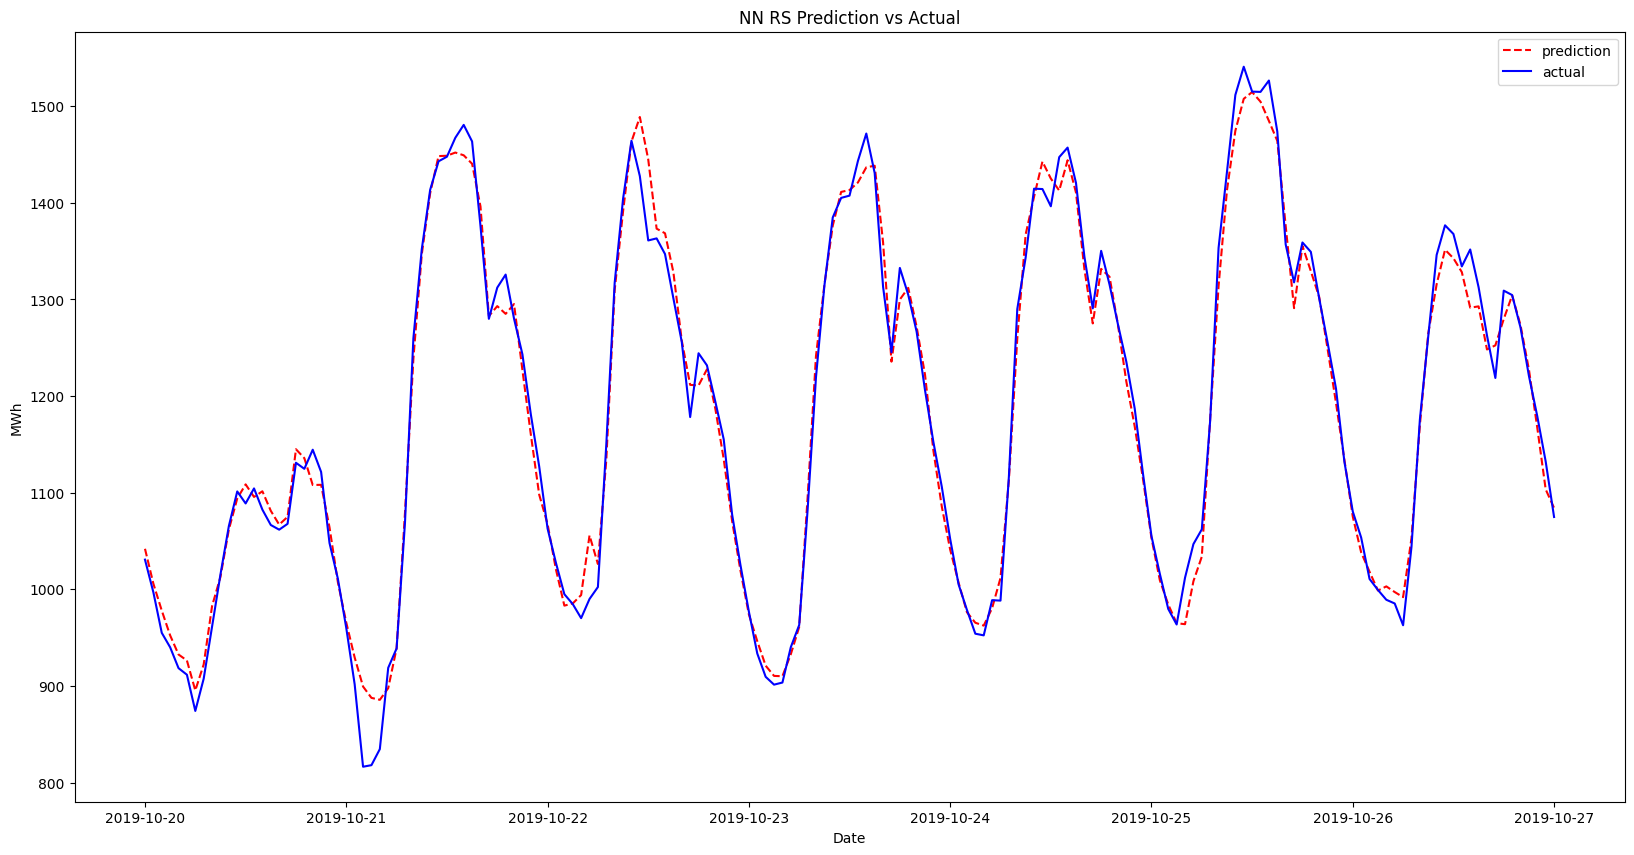

In [77]:
plt.figure(figsize=(20,10))
plt.plot(y_hat["2019-10-20 00:00:00":"2019-10-27 00:00:00"],linestyle="dashed",color='r')
plt.plot(y_test["2019-10-20 00:00:00":"2019-10-27 00:00:00"],linestyle="solid",color='b')
plt.xlabel("Date")
plt.ylabel("MWh")
plt.legend(["prediction","actual"])
plt.title("NN RS Prediction vs Actual")
plt.show()